In [6]:
import findspark
findspark.init('/home/ubuntu/spark-2.1.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('basics').getOrCreate()
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas

In [2]:
df = spark.read.format("csv").option("header","true").load("./2010_RD_Scoreboard_Global_cleaned_constructed_done.csv")

In [3]:
df.count()

1000

In [8]:
df.describe().show()

+-------+--------------------+-----------------+---------+--------------------+--------+-----------------+------------------+--------------------+--------------+-------------------+---------------------------+---------------------------+----------------------------------+-----------------------+--------------------+------------------+--------------+----------------------+----------------------+-------------------------+------------------+------------------+------------------+------------------+----------------------+----------------------+------------------+----------------------------+----------------------------+---------------------+------------------+------------------+----------------------+-----------------+-----------------+-----------------+------------------+
|summary|             Company|       Company ID|  Country|       Country GDP $|Not IFRS|   Industry group|          ICB code|Industry description|Listing status|2009 R&D investment|1 Yr R&D investment growth%|4 Yr R&D inv

In [9]:
df.printSchema()

root
 |-- Company: string (nullable = true)
 |-- Company ID: string (nullable = true)
 |-- Country: string (nullable = true)
 |-- Country GDP $: string (nullable = true)
 |-- Not IFRS: string (nullable = true)
 |-- Industry group: string (nullable = true)
 |-- ICB code: string (nullable = true)
 |-- Industry description: string (nullable = true)
 |-- Listing status: string (nullable = true)
 |-- 2009 R&D investment: string (nullable = true)
 |-- 1 Yr R&D investment growth%: string (nullable = true)
 |-- 4 Yr R&D investment growth%: string (nullable = true)
 |-- R&D investment / operation profit%: string (nullable = true)
 |-- R&D investment / sales%: string (nullable = true)
 |-- R&D + capex / sales%: string (nullable = true)
 |-- Operating profit: string (nullable = true)
 |-- If made profit: string (nullable = true)
 |-- 1 Yr operating profit%: string (nullable = true)
 |-- 4 Yr operating profit%: string (nullable = true)
 |-- Operating profit / sales%: string (nullable = true)
 |-- 

In [9]:
df.columns

['Company',
 'Company ID',
 'Country',
 'Country GDP $',
 'Not IFRS',
 'Industry group',
 'ICB code',
 'Industry description',
 'Listing status',
 '2009 R&D investment',
 '1 Yr R&D investment growth%',
 '4 Yr R&D investment growth%',
 'R&D investment / operation profit%',
 'R&D investment / sales%',
 'R&D + capex / sales%',
 'Operating profit',
 'If made profit',
 '1 Yr operating profit%',
 '4 Yr operating profit%',
 'Operating profit / sales%',
 'Sales',
 '1 Yr sales growth%',
 '4 Yr sales growth%',
 'Employees',
 '1 Yr employees growth%',
 '4 Yr employees growth%',
 'R&D / employees ',
 '1 Yr R&D / employees growth%',
 '4 Yr R&D / employees growth%',
 'Sales outside region%',
 'Market cap',
 'Market cap change%',
 'If market cap increase',
 'R&D spend 2008',
 'R&D spend 2007',
 'R&D spend 2006',
 'R&D spend 2005']

In [13]:
df.dtypes

[('Company', 'string'),
 ('Company ID', 'string'),
 ('Country', 'string'),
 ('Country GDP $', 'string'),
 ('Not IFRS', 'string'),
 ('Industry group', 'string'),
 ('ICB code', 'string'),
 ('Industry description', 'string'),
 ('Listing status', 'string'),
 ('2009 R&D investment', 'string'),
 ('1 Yr R&D investment growth%', 'string'),
 ('4 Yr R&D investment growth%', 'string'),
 ('R&D investment / operation profit%', 'string'),
 ('R&D investment / sales%', 'string'),
 ('R&D + capex / sales%', 'string'),
 ('Operating profit', 'string'),
 ('If made profit', 'string'),
 ('1 Yr operating profit%', 'string'),
 ('4 Yr operating profit%', 'string'),
 ('Operating profit / sales%', 'string'),
 ('Sales', 'string'),
 ('1 Yr sales growth%', 'string'),
 ('4 Yr sales growth%', 'string'),
 ('Employees', 'string'),
 ('1 Yr employees growth%', 'string'),
 ('4 Yr employees growth%', 'string'),
 ('R&D / employees ', 'string'),
 ('1 Yr R&D / employees growth%', 'string'),
 ('4 Yr R&D / employees growth%', 's

In [7]:
TargetData = pandas.read_csv("./2010_RD_Scoreboard_Global_cleaned_constructed_done.csv")

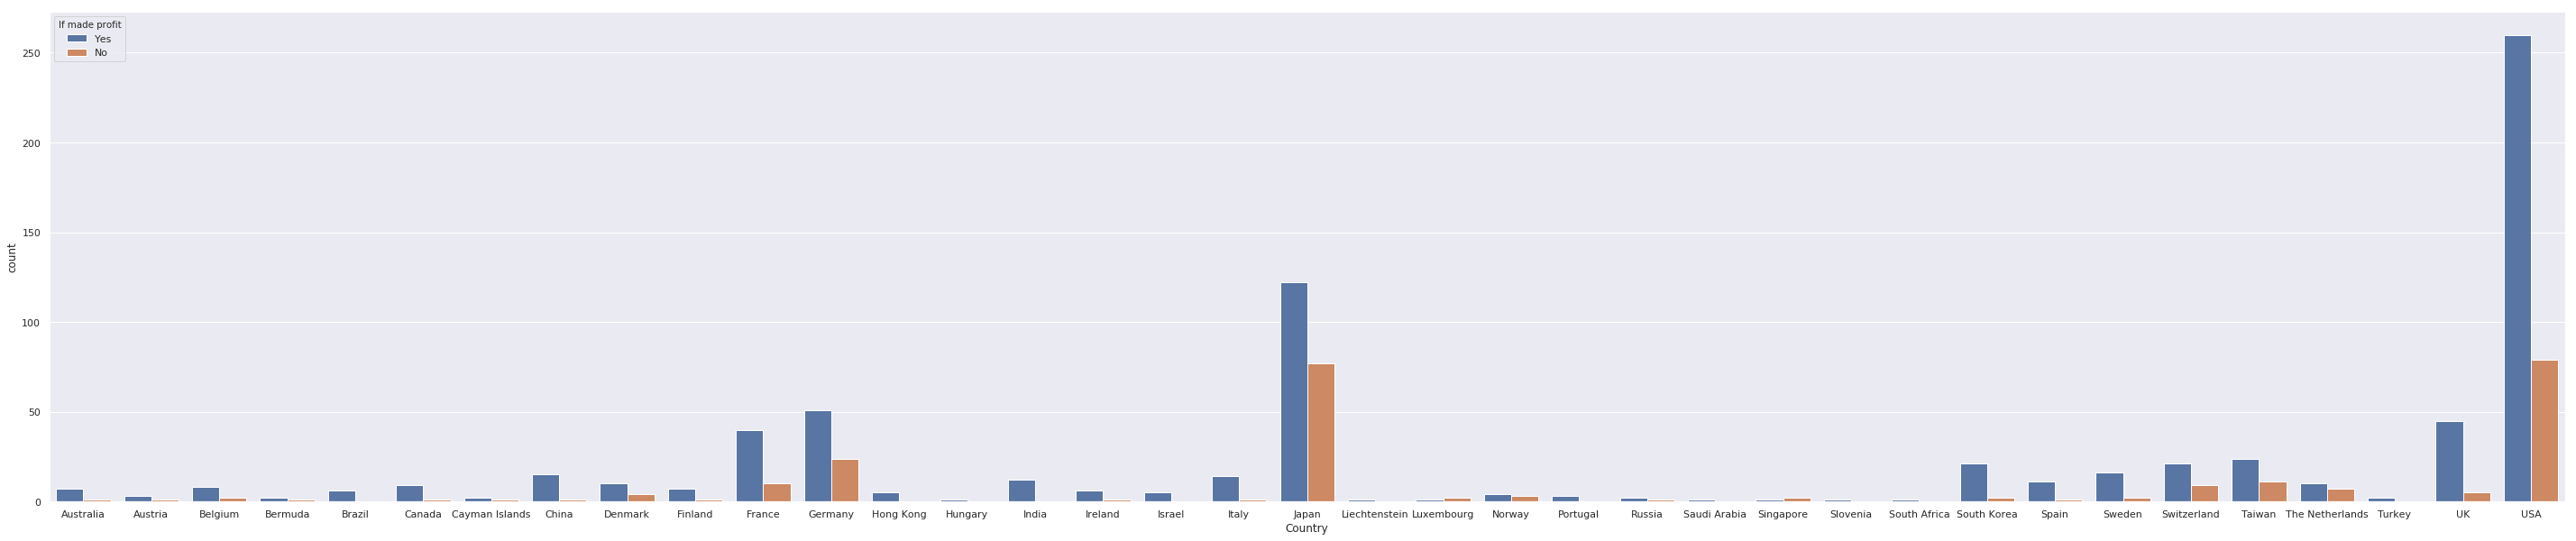

In [8]:
sns.set(style='whitegrid', color_codes=True)
sns.set(rc={'figure.figsize':(50, 10)})
sns.countplot('Country',data=TargetData, hue='If made profit')